<a href="https://colab.research.google.com/github/tsarangler/ECON3916-Statistical-Machine-Learning/blob/main/Assignment%202/Econ_3916_Assignment_2_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **PHASE 1**

In [2]:
np.random.seed(72)

In [10]:
normal_traffic = np.random.randint(20,50,980)
spike_traffic = np.random.randint(1000,5001, 20)
latency_logs = np.concatenate([normal_traffic, spike_traffic])

# np.random.shuffle(latency_logs)



In [7]:
def calculate_mad(data):
  median = np.median(data)
  abs_deviation = np.abs(data-median)
  mad = np.median(abs_deviation)

  return mad

sd = np.std(latency_logs)
mad = calculate_mad(latency_logs)

print(f"Standard Deviation (SD): {sd:.2f}ms")
print(f"Median Absolute Deviation (MAD): {mad:.2f}ms")

Standard Deviation (SD): 438.69ms
Median Absolute Deviation (MAD): 8.00ms


The SD squares the deviation whilst MAD uses absolute values and the median, so 20 outliers dont affect it

# **PHASE 2**

In [8]:
def bayesian_audit(prior, sensitivity, specificity):
  false_positive_rate = 1 - specificity
  p_flagged = (sensitivity * prior) + (false_positive_rate * (1 - prior))
  posterior = (sensitivity * prior) / p_flagged

  return posterior


print("Scenario A (Bootcamp): Base Rate = 50%")
result_a = bayesian_audit(prior=0.50, sensitivity=0.98, specificity=0.98)
print(f"P(Cheater | Flagged) = {result_a:.4f} or {result_a*100:.2f}%\n")

print("Scenario B (Econ Class): Base Rate = 5%")
result_b = bayesian_audit(prior=0.05, sensitivity=0.98, specificity=0.98)
print(f"P(Cheater | Flagged) = {result_b:.4f} or {result_b*100:.2f}%\n")

print("Scenario C (Honors Seminar): Base Rate = 0.1%")
result_c = bayesian_audit(prior=0.001, sensitivity=0.98, specificity=0.98)
print(f"P(Cheater | Flagged) = {result_c:.4f} or {result_c*100:.2f}%\n")

Scenario A (Bootcamp): Base Rate = 50%
P(Cheater | Flagged) = 0.9800 or 98.00%

Scenario B (Econ Class): Base Rate = 5%
P(Cheater | Flagged) = 0.7206 or 72.06%

Scenario C (Honors Seminar): Base Rate = 0.1%
P(Cheater | Flagged) = 0.0468 or 4.68%



# **PHASE 3**

In [9]:
observed = np.array([50250, 49750])
expected = np.array([50000, 50000])

chi_square = 0

for i in range(len(observed)):
    chi_square += (observed[i] - expected[i])**2 / expected[i]


print(f"Chi-Square: {chi_square:.4f}")
print(f"Critical Value: 3.84")

if chi_square > 3.84:
    print(f"INVALID!")
else:
    print(f"Valid experiment")

Chi-Square: 2.5000
Critical Value: 3.84
Valid experiment


# **PHASE 4**

All Tokens Mean Market Cap: $376,503.44
Survivors Mean Market Cap: $14,808,105.71
Survivorship Bias Factor: 39.33x

Tokens in graveyard: 10000
Tokens survived: 100


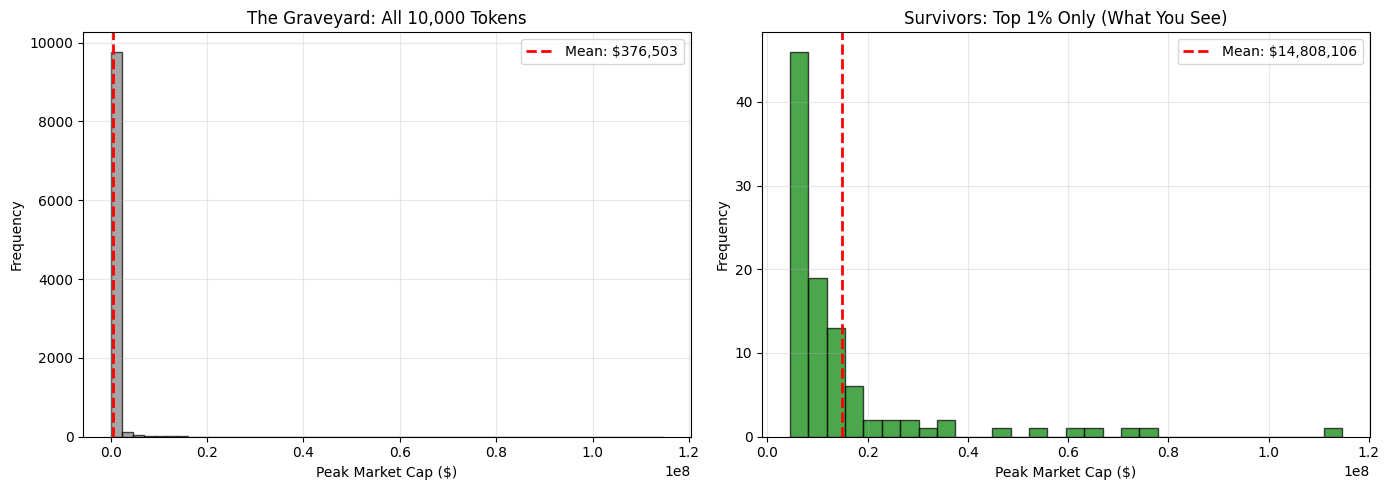

In [11]:
# Set seed for reproducibility
np.random.seed(42)

# Simulate 10,000 token launches with Pareto Distribution (Power Law)
# Shape parameter = 1.16 creates heavy concentration near zero
peak_market_caps = np.random.pareto(a=1.16, size=10000) * 100000

# Create df_all (The Graveyard - all tokens)
df_all = pd.DataFrame({
    'token_id': range(10000),
    'peak_market_cap': peak_market_caps
})

# Create df_survivors (Top 1% only)
top_1_percent_threshold = np.percentile(peak_market_caps, 99)
df_survivors = df_all[df_all['peak_market_cap'] >= top_1_percent_threshold].copy()

# Calculate means
mean_all = df_all['peak_market_cap'].mean()
mean_survivors = df_survivors['peak_market_cap'].mean()

# Print results
print(f"All Tokens Mean Market Cap: ${mean_all:,.2f}")
print(f"Survivors Mean Market Cap: ${mean_survivors:,.2f}")
print(f"Survivorship Bias Factor: {mean_survivors/mean_all:.2f}x")
print(f"\nTokens in graveyard: {len(df_all)}")
print(f"Tokens survived: {len(df_survivors)}")

# Dual histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# All tokens
axes[0].hist(df_all['peak_market_cap'], bins=50, edgecolor='black', alpha=0.7, color='gray')
axes[0].axvline(mean_all, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_all:,.0f}')
axes[0].set_xlabel('Peak Market Cap ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('The Graveyard: All 10,000 Tokens')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Survivors only
axes[1].hist(df_survivors['peak_market_cap'], bins=30, edgecolor='black', alpha=0.7, color='green')
axes[1].axvline(mean_survivors, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_survivors:,.0f}')
axes[1].set_xlabel('Peak Market Cap ($)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Survivors: Top 1% Only (What You See)')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()